# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

#url = url + "q=" + city + "&appid=" + weather_api_key
#response = print(requests.get(url))


In [4]:
#city1 = 'New York'
#city_url = url + "q=" + city1 + "&appid=" + weather_api_key

#print(requests.get(city_url).json())

In [5]:


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acapulco de juarez
Processing Record 2 of Set 1 | aykhal
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | tolanaro
Processing Record 6 of Set 1 | svetlyy
Processing Record 7 of Set 1 | la tuque
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | holualoa
Processing Record 11 of Set 1 | camana
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | dudinka
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | demba
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | pombas
Processing Record 23 of 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()


City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,acapulco de juarez,16.8634,-99.8901,297.99,87,91,1.01,MX,1723517866
1,aykhal,66.0000,111.5000,276.65,96,100,8.55,RU,1723517968
2,grytviken,-54.2811,-36.5092,264.23,62,100,3.92,GS,1723517969
3,port lincoln,-34.7333,135.8667,289.54,66,100,4.19,AU,1723517970
4,tolanaro,-25.0319,46.9987,291.19,88,0,3.09,MG,1723517972


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acapulco de juarez,16.8634,-99.8901,297.99,87,91,1.01,MX,1723517866
1,aykhal,66.0000,111.5000,276.65,96,100,8.55,RU,1723517968
2,grytviken,-54.2811,-36.5092,264.23,62,100,3.92,GS,1723517969
3,port lincoln,-34.7333,135.8667,289.54,66,100,4.19,AU,1723517970
4,tolanaro,-25.0319,46.9987,291.19,88,0,3.09,MG,1723517972


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

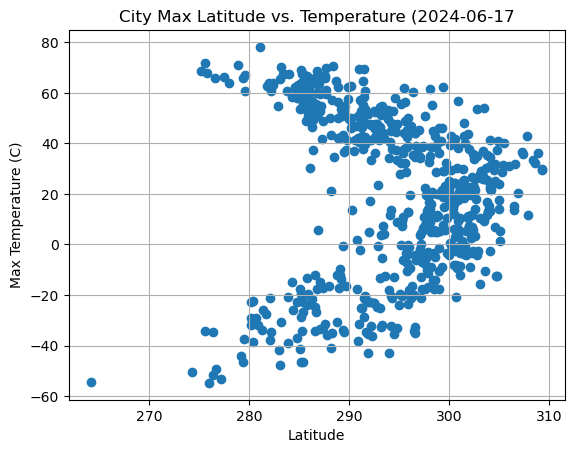

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-06-17')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

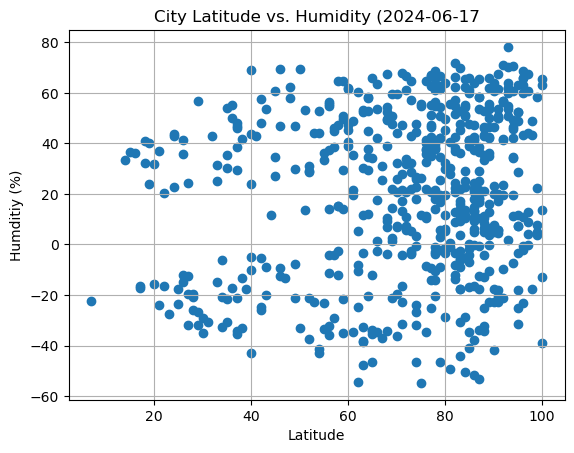

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Humidity'],city_data_df['Lat'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-06-17')
plt.ylabel('Humditiy (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

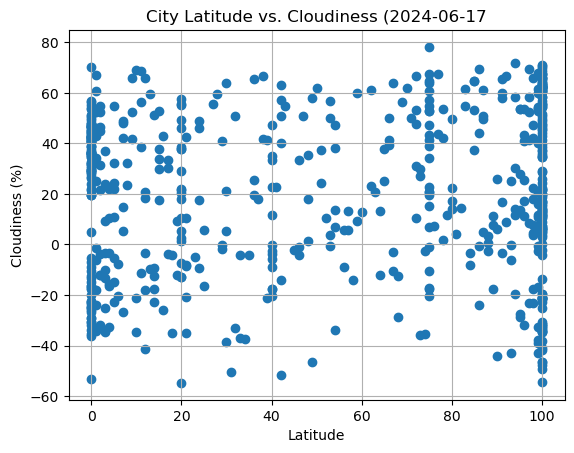

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Cloudiness'],city_data_df['Lat'])


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-17')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

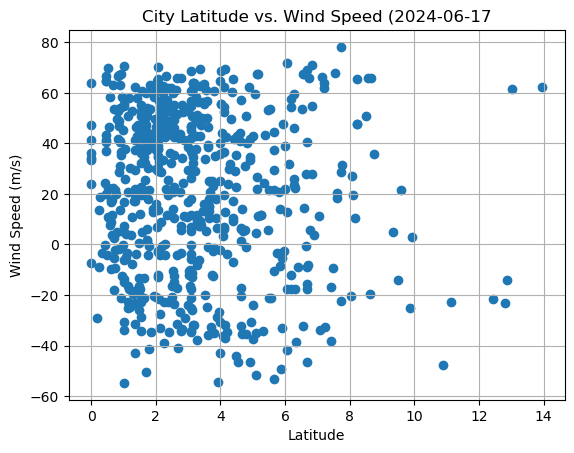

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Wind Speed'],city_data_df['Lat'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-17')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression(xaxis, yaxis, line_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
    regress = xaxis * slope + intercept 
    line_equation = 'y = '+ str(round(slope,2)) +  "x + " + str(round(intercept,2))
    plt.plot(xaxis, regress,'r-')
    plt.annotate(line_equation,(line_coord), fontsize =15, color = 'red')
    plt.scatter(xaxis,yaxis)
    print(f'The r-value is: {rvalue**2}')


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acapulco de juarez,16.8634,-99.8901,297.99,87,91,1.01,MX,1723517866
1,aykhal,66.0000,111.5000,276.65,96,100,8.55,RU,1723517968
5,svetlyy,54.6750,20.1347,287.21,78,2,2.28,RU,1723517973
6,la tuque,47.4334,-72.7824,290.29,77,54,2.06,CA,1723517974
7,yellowknife,62.4560,-114.3525,299.44,48,100,4.12,CA,1723517975


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,264.23,62,100,3.92,GS,1723517969
3,port lincoln,-34.7333,135.8667,289.54,66,100,4.19,AU,1723517970
4,tolanaro,-25.0319,46.9987,291.19,88,0,3.09,MG,1723517972
10,camana,-16.6228,-72.7111,288.01,86,0,2.50,PE,1723517978
11,invercargill,-46.4000,168.3500,285.38,79,100,4.92,NZ,1723517979


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5031926541380929


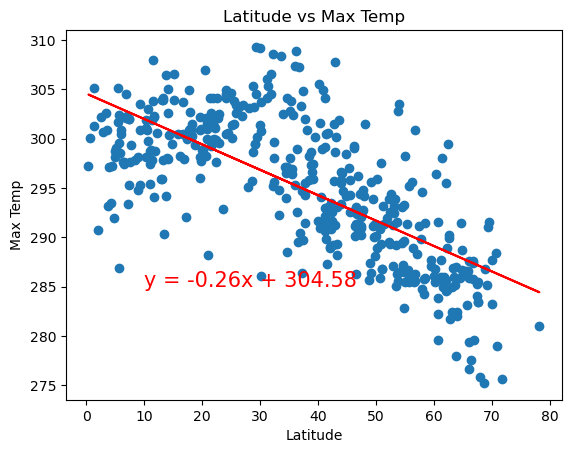

In [17]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10,285))
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

plt.show()


The r-value is: 0.5254163343315538


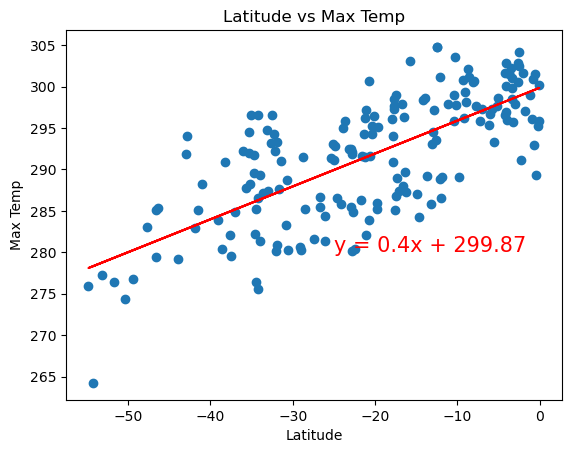

In [18]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-25,280))
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** 
We can see that the northern hemisphere, with an r value of 0.50, has a lower modteraly positive correlation to the max temperature comapred to the souther hemisphere which has a r of 0.53. This would indicate that in the southern hemisphere increases more with the latitude than it does with the northern hempishere and therefore the south has a more linear relationship with max temp. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0016659418525402936


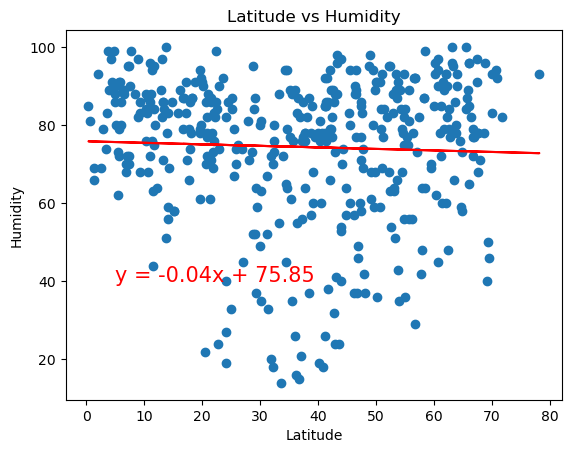

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], (5, 40))
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()

The r-value is: 0.011516714594272254


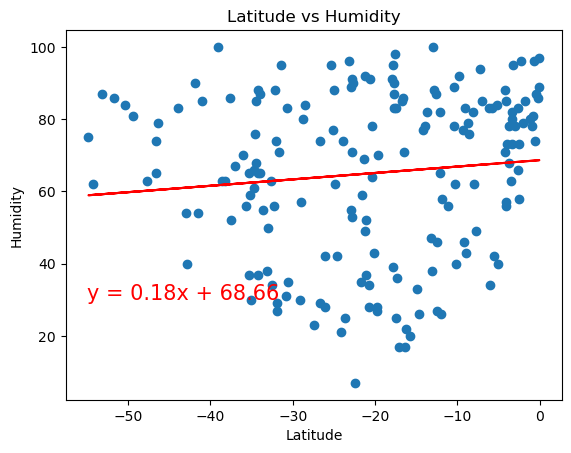

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-55,30))
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** 
In this case we can see the the southern hemisphere is more linearly coorelated with humidity in comparison to the northern hemisphere since 0.012 > 0.002. This stronger relationship would indicate that the more south you go the higher the likelyhood of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00011836435824575376


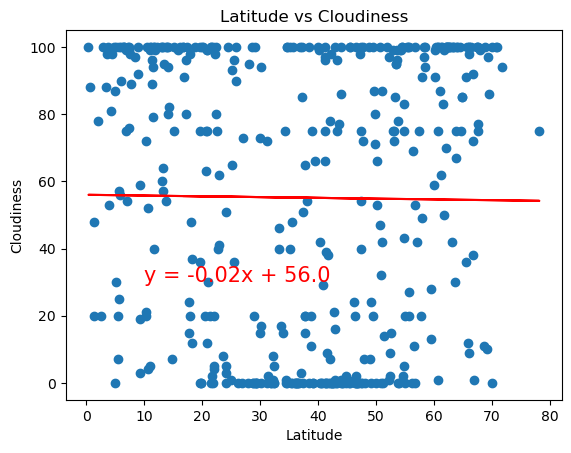

In [22]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (10,30))
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()

The r-value is: 0.03021721855011809


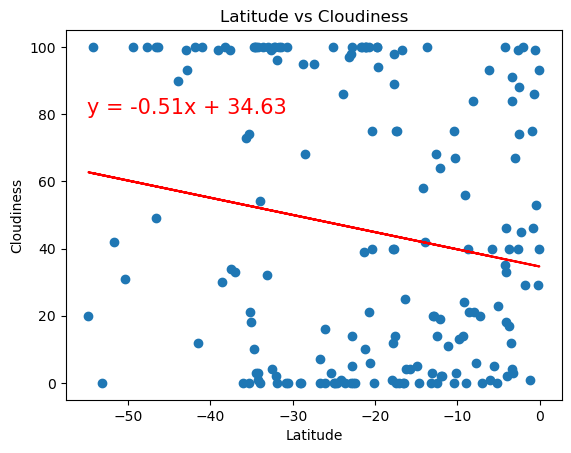

In [25]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-55,80))
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** 
Similarly to the previous graphs we see that the southern hemisphere is more coorelated to the level of cloudiness, compared to the northern hemisphere. This would indicate that the more south you go in latitude the higher the level of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0007296444921146469


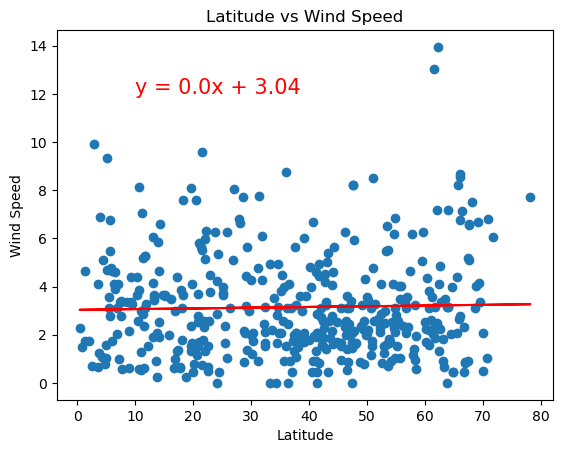

In [29]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (10,12))
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()

The r-value is: 0.028591141220419034


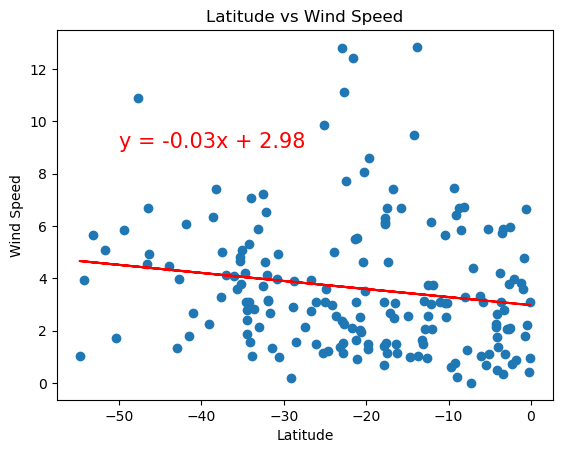

In [31]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-50,9))
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:**
We see that the southern hemisphere statistical relationship is more heavily coorelated with wind speed compared to the northern hempisphere. In this case that would indicate that the more south you go in latitiude the higher the wind speed. 